### Project Brief

Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

#### Spark Funds has two minor constraints for investments:

- It wants to invest between 5 to 15 million USD per round of investment

- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in


In [1]:
# Note that all source file to be placed under the data folder in present directory.
import os
os.getcwd()

'C:\\Users\\pc'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
#importing the matplot lib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
rounds2 = pd.read_csv("rounds2.csv",encoding='iso-8859-1')
companies=pd.read_csv("companies.csv",encoding='iso-8859-1')


Lets explore the data

In [4]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Harbour-Antibodies,#NAME?,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [7]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [8]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [10]:
# Lets determine the unique company name
print(len(companies.name.unique()))

66100


In [11]:
print(len(companies.permalink.unique()))

66368


In [12]:
print(len(rounds2.company_permalink.unique()))

90247


In [13]:
#endocding of data
rounds2["company_permalink"]=rounds2["company_permalink"].apply(lambda x:x.encode('utf-8').decode("ascii","ignore"))
companies["permalink"]=companies["permalink"].apply(lambda x:x.encode('utf-8').decode("ascii","ignore"))

In [14]:
#Calculating total unique companies present in rounds2
rounds2["company_permalink"]=rounds2["company_permalink"].apply(lambda x: x.lower())
len(rounds2["company_permalink"].unique())

66368

In [15]:
#Calculating total unique companies present in companies
companies["permalink"]=companies["permalink"].apply(lambda x: x.lower())
len(companies["permalink"].unique().tolist())

66368

In [16]:
#Comparing the company in both the dataframe
sum(np.sort(companies["permalink"])!=np.sort(rounds2["company_permalink"].unique()))

0

In [17]:
#Merging the two dataframe comapnies and rounds2
master_frame=pd.merge(companies,rounds2,how="inner",left_on=["permalink"],right_on=["company_permalink"])
master_frame.shape

(114949, 16)

In [18]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

In [19]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [20]:
#droping the null values of raised_amount_usd
master_frame=master_frame[~master_frame["raised_amount_usd"].isnull()]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                94959 non-null  object 
 1   name                     94958 non-null  object 
 2   homepage_url             90627 non-null  object 
 3   category_list            93915 non-null  object 
 4   status                   94959 non-null  object 
 5   country_code             89108 non-null  object 
 6   state_code               87355 non-null  object 
 7   region                   87911 non-null  object 
 8   city                     87914 non-null  object 
 9   founded_at               78993 non-null  object 
 10  company_permalink        94959 non-null  object 
 11  funding_round_permalink  94959 non-null  object 
 12  funding_round_type       94959 non-null  object 
 13  funding_round_code       28169 non-null  object 
 14  funded_at            

In [21]:
# Evaulate missing data in terms of percentage
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64

In [22]:
# removing non-contributing and duplicate columns 
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('company_permalink', axis=1)

# Views missing data report post initial cleanup 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

At this point we have 6 columns with missing data. 
** I would be hesitent to remove any more row data as we have the raised_amount_usd info for all remaining rows. **
We could ignore the missing values of state_code, region and city as they do not bring any value for our final analysis


In [23]:
# lets furture remove some of the columns which does not contribute to our current analysis
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)

# Missing data report post cleanup 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [24]:
# fraction of rows lost
len(master_frame.index)/114942

0.8261471002766613

In [25]:
master_frame.country_code.isnull().sum()

5851

In [26]:
#Removing all the null values in country_code
master_frame=master_frame[~master_frame["country_code"].isnull()]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [27]:
#Removing all the null values in category_list
master_frame=master_frame[~master_frame["category_list"].isnull()]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.
 

Spark Funds wants to choose one of these four investment types for each potential investment they will make.

 

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity).

Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

In [28]:
#As we are only intrested in venture, angel, seed and private_equity Funding type
master_frame=master_frame[master_frame["funding_round_type"].isin(["venture","angel","seed","private_equity"])]

In [29]:
master_frame.shape

(75124, 9)

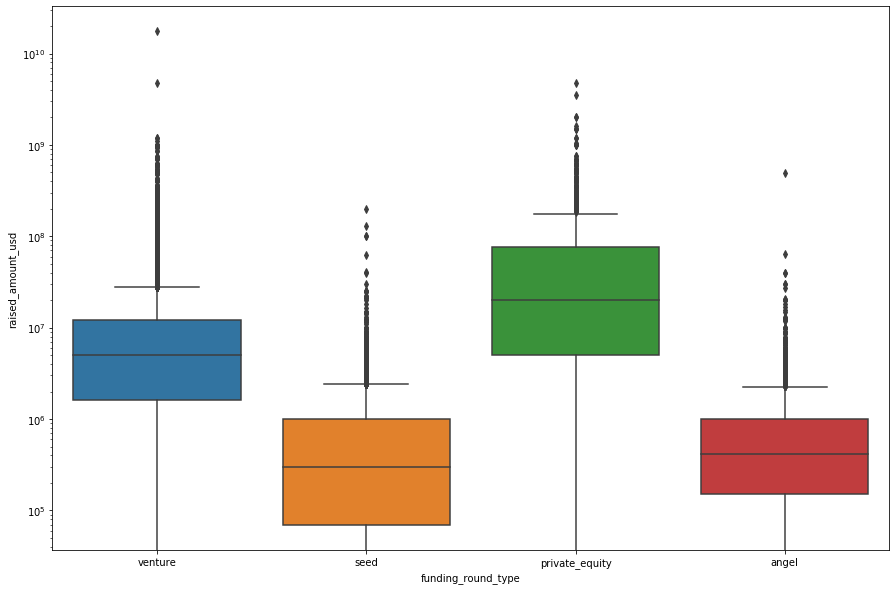

In [30]:
# boxplot of a variable across various funding categories
plt.figure(figsize=(15, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

In [31]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

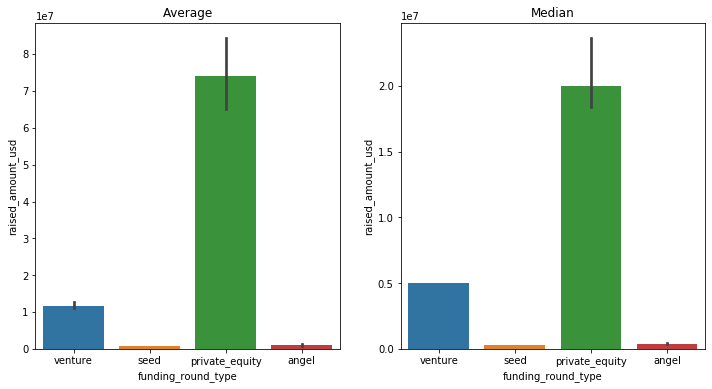

In [32]:
# Create 2 subplots for mean and median respectively

# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y="raised_amount_usd", data=master_frame,estimator=np.mean)
plt.title("Average")

# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame, estimator=np.median)
plt.title("Median")

plt.show()

In [33]:
#Average funding amount of venture type
master_frame[master_frame["funding_round_type"]=="venture"].raised_amount_usd.mean()

11724222.690204773

In [34]:
master_frame[master_frame["funding_round_type"]=="seed"].raised_amount_usd.mean()

747793.6824840009

In [35]:
master_frame[master_frame["funding_round_type"]=="angel"].raised_amount_usd.mean()

971573.8911363636

In [36]:
master_frame[master_frame["funding_round_type"]=="private_equity"].raised_amount_usd.mean()

73938486.27527472

In [37]:
plot=master_frame.groupby(["funding_round_type"])["raised_amount_usd"].agg(Fraction='sum',Average='mean').reset_index()
plot["Fraction"]=plot["Fraction"].apply(lambda x:round((x/plot.Fraction.sum())*100,2))
plot["Average"]=plot["Average"].apply(lambda x:round(x,2))
plot

,funding_round_type,Fraction,Average
0,angel,0.60,971573.89
1,private_equity,18.82,73938486.28
2,seed,2.21,747793.68
3,venture,78.38,11724222.69


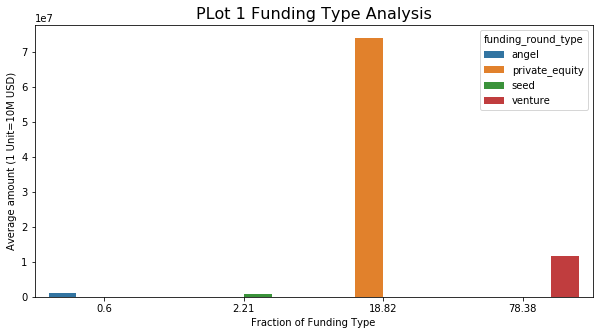

In [38]:
#ploting th graph between average and fraction of funding amount
plt.figure(figsize=(10,5))
plot1=sns.barplot(data=plot,x="Fraction",y="Average",hue="funding_round_type")
plot1.set(xlabel="Fraction of Funding Type",ylabel="Average amount (1 Unit=10M USD)")
plot1.set_title("PLot 1 Funding Type Analysis",fontsize=16)
plt.show()

### From above chart it seems that many are investing in venture and they fall in the bracket of 5 to 15 million which spark fund have budgeted for. 

In [39]:
#Let's  filter the data with funding Type Ventur
master_frame=master_frame[master_frame["funding_round_type"]=="venture"]
master_frame.describe()

,raised_amount_usd
count,4.780900e+04
mean,1.172422e+07
std,8.821571e+07
min,0.000000e+00
25%,1.600000e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


In [40]:
#finding the top 9 countries where investment occured most
top9=master_frame.groupby(["country_code"])["raised_amount_usd"].sum().sort_values(ascending=False).head(9)
top9

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [41]:
top9_df=master_frame[master_frame.country_code.isin(top9.index.tolist())]

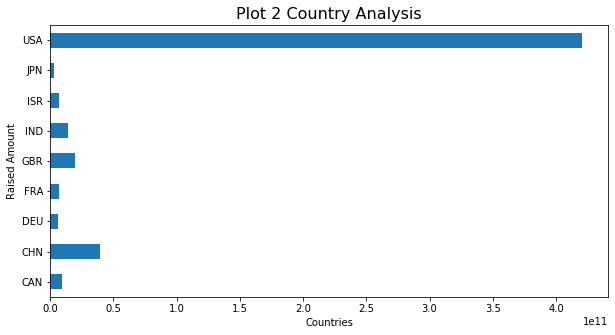

In [42]:
#plot the graph of top 9 english speaking cuntries
plt.figure(figsize=(10,5))
plot2=top9_df.groupby(["country_code"])["raised_amount_usd"].sum().plot.barh()
plot2.set(xlabel="Countries",ylabel="Raised Amount")
plot2.set_title("Plot 2 Country Analysis",fontsize=16)
plt.show()

### Top three english speaking countires are
USA

GBR

IND

In [43]:
#creating column primary_sector
master_frame["primary_sector"]=master_frame["category_list"].apply(lambda x:x.split('|')[0] if '|' in x else x)
master_frame["primary_sector"]=master_frame["primary_sector"].str.lower()

In [44]:
#importing the mapping file
mapping=pd.read_csv("mapping.csv")
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [45]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


### Totally there are 7 main categories excluding Others and Blank data

In [46]:
mapping.category_list[20]

'Alter0tive Medicine'

In [47]:
#Cleaning the data
mapping.category_list=mapping.category_list.apply(lambda x: str(x).replace("0","na"))

In [48]:
mapping.category_list[20]

'Alternative Medicine'

In [49]:
mapping.describe()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.031977,0.001453,0.077035,0.129360,0.091570,0.058140,0.104651,0.283430,0.222384
std,0.176066,0.038125,0.266841,0.335843,0.288627,0.234177,0.306326,0.450991,0.416150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
main_sector=mapping.iloc[:,1:]
main_sector=main_sector.idxmax(axis=1)
main_sector.head()

0                                     Blanks
1                              Manufacturing
2                              Manufacturing
3                              Manufacturing
4    Social, Finance, Analytics, Advertising
dtype: object

In [51]:
category_list=mapping["category_list"]
mapping_sector=pd.concat([category_list,main_sector],axis=1)
mapping_sector=mapping_sector.rename(columns={0:'main_sector'})
mapping_sector=mapping_sector.rename(columns={'category_list':'primary_sector'})
mapping_sector["primary_sector"]=mapping_sector["primary_sector"].str.lower()
mapping_sector

,primary_sector,main_sector
0,nan,Blanks
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
4,accounting,"Social, Finance, Analytics, Advertising"
...,...,...
683,wholesale,Others
684,wine and spirits,Entertainment
685,wireless,Entertainment
686,women,Others


In [52]:
master_frame=pd.merge(master_frame,mapping_sector,how='left',on='primary_sector',indicator=True)
master_frame

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,_merge
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment,both
1,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,curated web,"News, Search and Messaging",both
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,biotechnology,Cleantech / Semiconductors,both
3,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics,"Social, Finance, Analytics, Advertising",both
4,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics,"Social, Finance, Analytics, Advertising",both
...,...,...,...,...,...,...,...,...,...,...,...,...
47804,/organization/zyraz-technology,Zyraz Technology,Biotechnology,closed,MYS,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7991547.0,biotechnology,Cleantech / Semiconductors,both
47805,/organization/zyrra,Zyrra,E-Commerce,operating,USA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,e-commerce,Others,both
47806,/organization/zystor,Zystor,Biotechnology,acquired,USA,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,biotechnology,Cleantech / Semiconductors,both
47807,/organization/zytoprotec,Zytoprotec,Biotechnology,operating,AUT,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.0,biotechnology,Cleantech / Semiconductors,both


We have added two new columns in master_frame primary_sector and main_sector

In [53]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47809 entries, 0 to 47808
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   permalink                47809 non-null  object  
 1   name                     47809 non-null  object  
 2   category_list            47809 non-null  object  
 3   status                   47809 non-null  object  
 4   country_code             47809 non-null  object  
 5   funding_round_permalink  47809 non-null  object  
 6   funding_round_type       47809 non-null  object  
 7   funded_at                47809 non-null  object  
 8   raised_amount_usd        47809 non-null  float64 
 9   primary_sector           47809 non-null  object  
 10  main_sector              47789 non-null  object  
 11  _merge                   47809 non-null  category
dtypes: category(1), float64(1), object(10)
memory usage: 4.4+ MB


In [54]:
#Now filtering the master_frame with top 3 countire
countries=["USA","GBR","IND"]
master_frame=master_frame[master_frame["country_code"].isin(countries)]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 47806
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   permalink                38803 non-null  object  
 1   name                     38803 non-null  object  
 2   category_list            38803 non-null  object  
 3   status                   38803 non-null  object  
 4   country_code             38803 non-null  object  
 5   funding_round_permalink  38803 non-null  object  
 6   funding_round_type       38803 non-null  object  
 7   funded_at                38803 non-null  object  
 8   raised_amount_usd        38803 non-null  float64 
 9   primary_sector           38803 non-null  object  
 10  main_sector              38788 non-null  object  
 11  _merge                   38803 non-null  category
dtypes: category(1), float64(1), object(10)
memory usage: 3.6+ MB


Spark Funds wants to invest between 5 to 15 million USD per investment round


In [55]:
#Filtering the data on above condition
master_frame=master_frame[(master_frame["raised_amount_usd"]<15000000) & (master_frame["raised_amount_usd"]>5000000)] 
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10788 entries, 0 to 47806
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   permalink                10788 non-null  object  
 1   name                     10788 non-null  object  
 2   category_list            10788 non-null  object  
 3   status                   10788 non-null  object  
 4   country_code             10788 non-null  object  
 5   funding_round_permalink  10788 non-null  object  
 6   funding_round_type       10788 non-null  object  
 7   funded_at                10788 non-null  object  
 8   raised_amount_usd        10788 non-null  float64 
 9   primary_sector           10788 non-null  object  
 10  main_sector              10787 non-null  object  
 11  _merge                   10788 non-null  category
dtypes: category(1), float64(1), object(10)
memory usage: 1022.0+ KB


Divide master_frame data frame amoung top3 countries as D1,D2 and D3

In [56]:
D1=master_frame[master_frame["country_code"]=="USA"]
counts=(D1["main_sector"].value_counts()).to_dict()
amount=(D1.groupby(["main_sector"])["raised_amount_usd"].sum()).to_dict()
D1['investment_counts'] = D1['main_sector'].map(counts) 
D1['total_amount'] = D1['main_sector'].map(amount) 

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [57]:
D2=master_frame[master_frame["country_code"]=="GBR"]
counts=(D2["main_sector"].value_counts()).to_dict()
amount=(D2.groupby(["main_sector"])["raised_amount_usd"].sum()).to_dict()
D2['investment_counts'] = D2['main_sector'].map(counts) 
D2['total_amount'] = D2['main_sector'].map(amount) 

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [58]:
D3=master_frame[master_frame["country_code"]=="IND"]
counts=(D3["main_sector"].value_counts()).to_dict()
amount=(D3.groupby(["main_sector"])["raised_amount_usd"].sum()).to_dict()
D3['investment_counts'] = D3['main_sector'].map(counts) 
D3['total_amount'] = D3['main_sector'].map(amount)

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [59]:
#Total no. of investment count
print("Total investment count in USA",D1.investment_counts.count())
print("Total investment count in Great Britan",D2.investment_counts.count())
print("Total investment count in India",D3.investment_counts.count())

Total investment count in USA 9983
Total investment count in Great Britan 561
Total investment count in India 243


In [60]:
#Total amount if investment
print("Total investment amount in USA",D1.total_amount.sum())
print("Total investment amount in Great Britan",D2.total_amount.sum())
print("Total investment amount in India",D3.total_amount.sum())

Total investment amount in USA 157848148108098.0
Total investment amount in Great Britan 477968941610.0
Total investment amount in India 99848377641.0


In [61]:
#Top three (based on count of investments)
print("Top 3 investment in USA")
print("")
print(D1.groupby('main_sector')["investment_counts"].count().sort_values(ascending=False).head(3))
print("")
print("Top 3 investment in Great Britain")
print("")
print(D2.groupby('main_sector')["investment_counts"].count().sort_values(ascending=False).head(3))
print("")
print("Top 3 investment in India")
print("")
print(D3.groupby('main_sector')["investment_counts"].count().sort_values(ascending=False).head(3))

Top 3 investment in USA

main_sector
Others                                     2423
Social, Finance, Analytics, Advertising    2216
Cleantech / Semiconductors                 1991
Name: investment_counts, dtype: int64

Top 3 investment in Great Britain

main_sector
Others                                     129
Cleantech / Semiconductors                 126
Social, Finance, Analytics, Advertising    118
Name: investment_counts, dtype: int64

Top 3 investment in India

main_sector
Others                                     78
Social, Finance, Analytics, Advertising    45
News, Search and Messaging                 41
Name: investment_counts, dtype: int64


In [62]:
# For the top sector count-wise (point 3), which company received the highest investment?
D1_new=D1[D1.main_sector=="Others"]
D1_new[D1_new["raised_amount_usd"]==D1_new["raised_amount_usd"].max()].name

39301    SpiderCloud Wireless
Name: name, dtype: object

In [63]:
D2_new=D2[D2.main_sector=="Others"]
D2_new[D2_new["raised_amount_usd"]==D2_new["raised_amount_usd"].max()].name

27405    MyOptique Group
Name: name, dtype: object

In [64]:
D3_new=D3[D3.main_sector=="Others"]
D3_new[D3_new["raised_amount_usd"]==D3_new["raised_amount_usd"].max()].name

14749    EximSoft-Trianz
15513       FirstCry.com
18848         HomeShop18
27386             Myntra
Name: name, dtype: object

In [65]:
#for the second-best sector count-wise (point 4), which company received the highest investment?
D1_new2=D1[D1.main_sector=="Social, Finance, Analytics, Advertising"]
D1_new2[D1_new2["raised_amount_usd"]==D1_new2["raised_amount_usd"].max()].name

15741    Flite
Name: name, dtype: object

In [66]:
D2_new2=D2[D2.main_sector=="Cleantech / Semiconductors"]
D2_new2[D2_new2["raised_amount_usd"]==D2_new2["raised_amount_usd"].max()].name

29893    Onyvax
Name: name, dtype: object

In [67]:
D3_new2=D3[D3.main_sector=="Social, Finance, Analytics, Advertising"]
D3_new2[D3_new2["raised_amount_usd"]==D3_new2["raised_amount_usd"].max()].name

20596    inTarvo
Name: name, dtype: object

In [68]:
#Filtering D1,D2,D3 with  top 3 sectors
D1 = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D2 = D2[D2['main_sector'].isin(["Others","Cleantech / Semiconductors","Social, Finance, Analytics, Advertising"])]
D3 = D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "News, Search and Messaging"])]


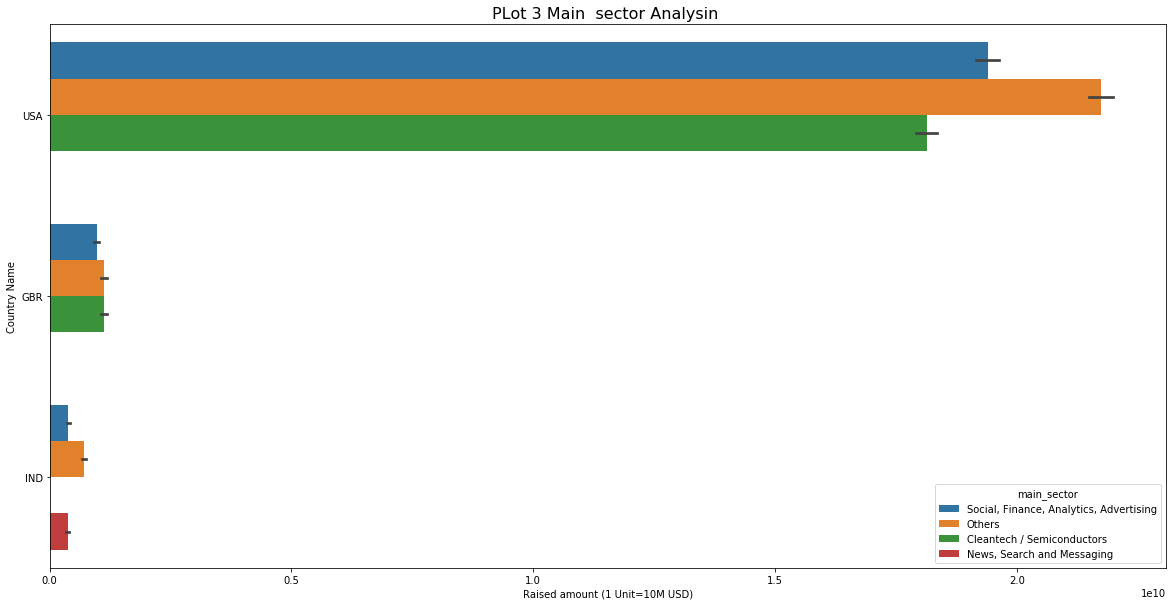

In [69]:
countries= [D1, D2, D3]
result = pd.concat(countries)
plt.figure(figsize=(20, 10))
plot3=sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=result, estimator=np.sum)
plot3.set(xlabel="Raised amount (1 Unit=10M USD)",ylabel="Country Name")
plot3.set_title("PLot 3 Main  sector Analysin ",fontsize=16)
plt.show()

### Conclusion
Top most commom investment type o invest between 5 to 15 million USD per investment round in is venture
Top 3 English speaking countries are USA, Great Britain and India

Top 3 investment sectors in USA to invest are:-
Others                                     
Social, Finance, Analytics, Advertising    
Cleantech / Semiconductors                 


Top 3 investment sectors in Great Britain are:-

Others                                  
Cleantech / Semiconductors                 
Social, Finance, Analytics, Advertising    

Top 3 investment sectors in India are:-

Others                                     
Social, Finance, Analytics, Advertising    
News, Search and Messaging                     

